## Let's try Bant Spirit first !

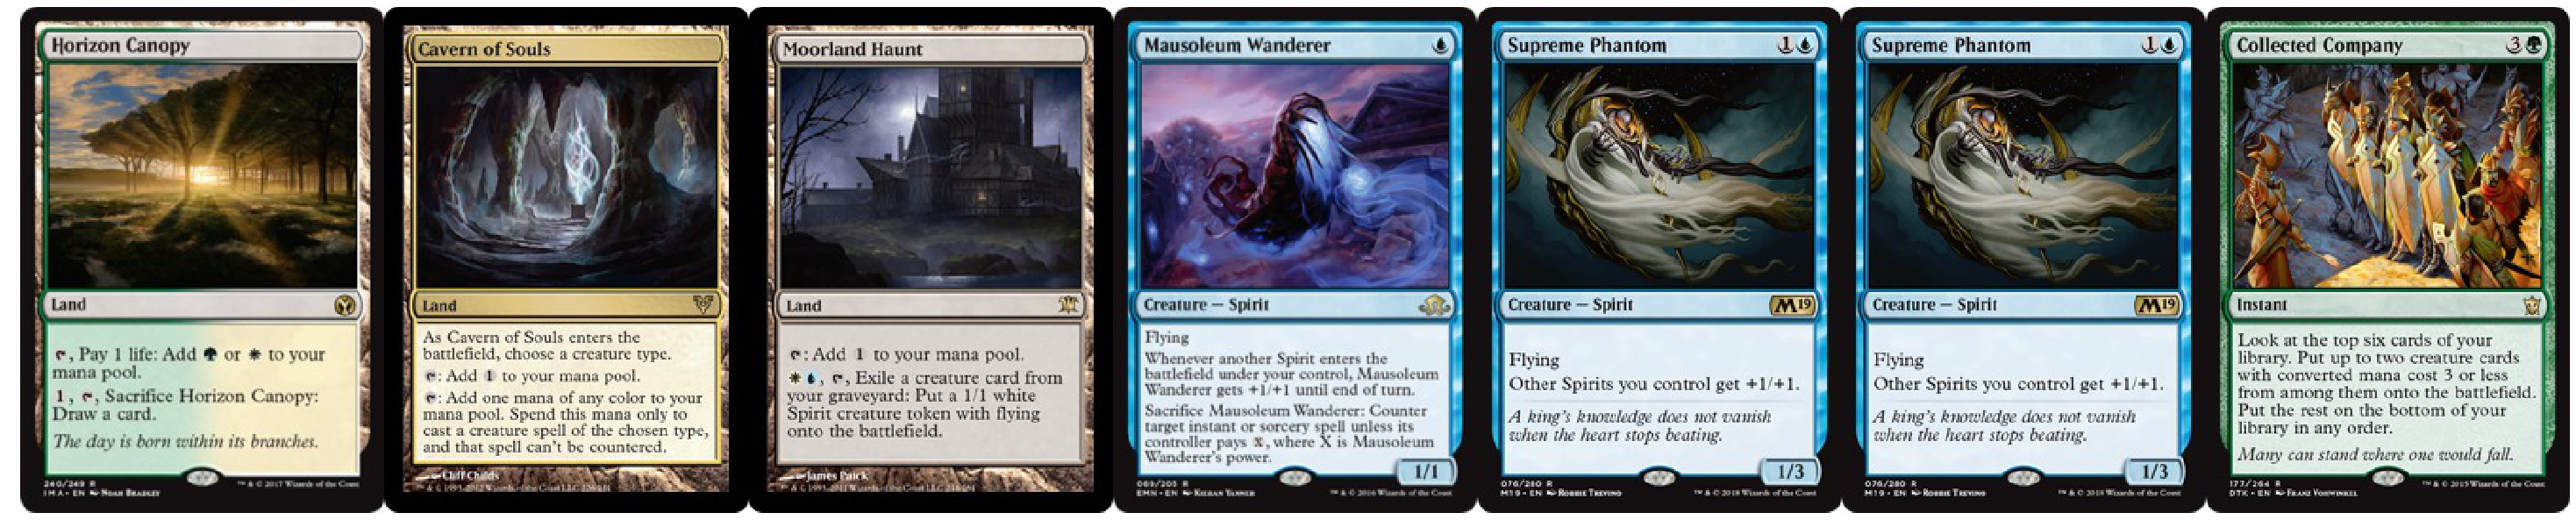

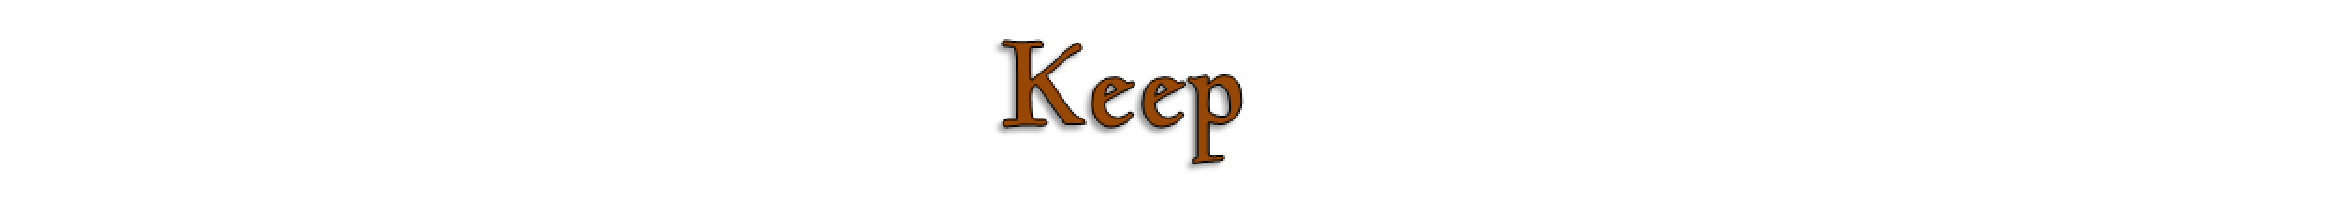

In [12]:
from magic import *
mulliganer = Main('BantSpirit',Resolution='high')
hand = 'horizon_canopy moorland_haunt cavern_of_souls  mausoleum_wanderer supreme_phantom supreme_phantom collected_company'
mulliganer.RunHand(hand)

## Now let's do it for Burn !

In [11]:
mulliganer = Main('Burn',Resolution='high')
hand = 'rift_bolt rift_bolt rift_bolt  wooded_foothills lightning_helix monastery_swiftspear monastery_swiftspear'
#mulliganer.RunHand(hand)

## This is now the experimental part of this notebook, where you create training examples

In [1]:
from magic import *
from DeckDictBantSpirit import *
from DeckDictHumans import *
from DeckDictBurn import *

In [5]:
DeckDictNoBlueLands = {"forest" :1,
                     "plains" :1,
                    "temple_garden" :1,
                    "horizon_canopy" :3 ,
                    "moorland_haunt" :1}

DeckDictBlueLands = {"flooded_strand" :2, 
                    "hallowed_fountain" : 1,
                    "island" :1,
                 "misty_rainforest" :3,
                "seachrome_coast" :1,
                "windswept_heath" :2,
                "botanical_sanctum" :2,
                 "breeding_pool" :1,
                 "cavern_of_souls" :1 }

DeckDictLands = {"flooded_strand" :2, 
                 "forest" :1,
                 "hallowed_fountain" : 1,
                 "horizon_canopy" :3 ,
                 "island" :1,
                 "misty_rainforest" :3,
                 "moorland_haunt" :1,
                 "plains" :1,
                 "seachrome_coast" :1,
                 "temple_garden" :1 ,
                 "windswept_heath" :2,
                "botanical_sanctum" :2,
                 "breeding_pool" :1,
                 "cavern_of_souls" :1}



DeckDictOther = {"drogskol_captain" :4,
                 "geist_of_saint_traft" :2,
                 "mausoleum_wanderer" :4,
                 "noble_hierarch" :4,
                 "phantasmal_image" :3,
                 "rattlechains" :1,
                 "selfless_spirit" :2,
                 "spell_queller" :4,
                 "supreme_phantom" :4,
                 "collected_company" :4,
                 "path_to_exile" :4}

DeckDictWanderer = {"mausoleum_wanderer" :3}
DeckDictHierarch = {"noble_hierarch" : 2}
DeckDictVial = {"aether_vial" :3}
DeckDictSeachrome = {"seachrome_coast" :1}


DeckDictSpells = {"drogskol_captain" :4,
                 "geist_of_saint_traft" :2,
                 "mausoleum_wanderer" :4,
                 "phantasmal_image" :3,
                 "rattlechains" :1,
                 "selfless_spirit" :2,
                 "spell_queller" :4,
                 "supreme_phantom" :4,
                 "collected_company" :4,
                 "path_to_exile" :4}

DeckDict34Drops = {"drogskol_captain" :4,
                  "geist_of_saint_traft" :2,
                  "spell_queller" :4,
                  "collected_company" :4}


In [6]:
DictList = [DeckDictLands,DeckDictVial,DeckDictHierarch,DeckDictOther]
nList = [1,1,2,3]
spirit = Train('BantSpirit',DeckDictSpirit)
spirit.MakeControlledTrainingSetWithModel(7,DictList,nList,TrainingSetSize=0,TrainingFileName='TrainingSetNames')
spirit.TransformTrainingSet(TrainingFileInput = 'TrainingSetNames')
spirit.TrainAndSaveWeights(Nestimators =200,MaxDepth=7)

Written !
Written !
N_examples :  902
N_features :  70
0.9301552106430155


## Increase the TrainingSet

In [30]:
spirit = Train('BantSpirit',DeckDictSpirit)
spirit.MakeTrainingSetWithModel(7,TrainingSetSize=0,TrainingFileName='TrainingSetNames')
spirit.TransformTrainingSet(TrainingFileInput = 'TrainingSetNames')
spirit.TrainAndSaveWeights(Nestimators =105)

Written !
Written !
N_examples :  902
N_features :  70
1.0


## Increase the TestingSet

In [10]:
spirit = Train('BantSpirit',DeckDictSpirit)
spirit.MakeTrainingSetWithModel(7,TrainingSetSize=0,TrainingFileName='TestingSetNames')
spirit.TransformTrainingSet(TrainingFileInput = 'TestingSetNames',TrainingFileOutput = 'TestingSet')

Written !
Written !


## Test the algorithm on the TestingSet

In [14]:
Spirit = Train('BantSpirit',DeckDictSpirit)
Spirit.TrainAndTest(Nestimators = 200,MaxDepth = 7,FindBestNestimators=False, TestingFileInput = 'TestingSet')
Spirit.TrainAndTest(Nestimators = 200,MaxDepth = 7,FindBestNestimators=False, TestSize = 0.2)

N_examples :  902
N_training examples : 902
N_test examples : 200 

Training Score : 0.9302 
Testing Score : 0.91 

N_examples :  902
N_training examples : 721 
N_test examples : 181 

Training Score : 0.9417 
Testing Score : 0.9006 



## Runs the model on Controlled hands to detect mistakes

In [11]:
DictList = [DeckDictNoBlueLands,DeckDictBlueLands,DeckDictWanderer]
nList = [3,1,3]
spirit = Main('BantSpirit',DeckDictSpirit,Resolution='low')
spirit.TestModel(0,DictList,nList)

## Few errors still persisting...

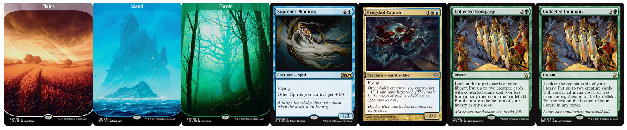

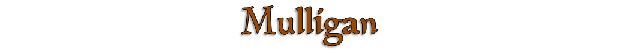

In [8]:
spirit = Main('BantSpirit',Resolution='low')
hands = []
#hands.append('island forest plains supreme_phantom drogskol_captain collected_company collected_company')
for hand in hands:
    spirit.RunHand(hand)

In [35]:
spirit = Main('BantSpirit',Resolution='low')
#for hand in FailedHands:
#    spirit.RunHand(hand)

## Let's see what the mulliganer looks at first :

In [7]:
#HumanAnalyse = Analyse('Humans')
#HumanAnalyse.AnalysePattern()

SpiritAnalyse = Analyse('BantSpirit')
SpiritAnalyse.AnalysePattern()

The N°1 feature is the feature : "type_of_card" of the card N°5  with the score of 9.42 percents 
The N°2 feature is the feature : "produces_U" of the card N°3  with the score of 6.97 percents 
The N°3 feature is the feature : "Need_W" of the card N°2  with the score of 5.88 percents 
The N°4 feature is the feature : "produces_U" of the card N°2  with the score of 5.82 percents 
The N°5 feature is the feature : "CCM" of the card N°4  with the score of 5.78 percents 
The N°6 feature is the feature : "produces_U" of the card N°1  with the score of 5.49 percents 
The N°7 feature is the feature : "type_of_card" of the card N°2  with the score of 4.33 percents 
The N°8 feature is the feature : "CCM" of the card N°5  with the score of 3.57 percents 
The N°9 feature is the feature : "type_of_card" of the card N°4  with the score of 3.3 percents 
The N°10 feature is the feature : "type_of_card" of the card N°3  with the score of 3.2 percents 


N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.9227 , Best N_estimators found : 200 

Training Score : 0.9251 
Testing Score : 0.9227 

1 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.884 , Best N_estimators found : 200 

Training Score : 0.9417 
Testing Score : 0.884 

2 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8895 , Best N_estimators found : 200 

Training Score : 0.9376 
Testing Score : 0.8895 

3 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.9227 , Best N_estimators found : 201 

Training Score : 0.9307 
Testing Score : 0.9227 

4 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score foun

Best Score found : 0.8785 , Best N_estimators found : 200 

Training Score : 0.932 
Testing Score : 0.8785 

38 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8508 , Best N_estimators found : 200 

Training Score : 0.9362 
Testing Score : 0.8508 

39 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.9227 , Best N_estimators found : 200 

Training Score : 0.9334 
Testing Score : 0.9227 

40 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8729 , Best N_estimators found : 200 

Training Score : 0.939 
Testing Score : 0.8729 

41 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8619 , Best N_estimators found : 200 

Training Score : 0.9445 
Testing Score : 0.8619 

42 /

Best Score found : 0.9227 , Best N_estimators found : 200 

Training Score : 0.939 
Testing Score : 0.9227 

75 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8729 , Best N_estimators found : 200 

Training Score : 0.9542 
Testing Score : 0.8729 

76 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.9006 , Best N_estimators found : 200 

Training Score : 0.9404 
Testing Score : 0.9006 

77 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8508 , Best N_estimators found : 200 

Training Score : 0.9542 
Testing Score : 0.8508 

78 / 100
N_examples :  902
N_training examples : 721 
N_test examples : 181 

Finding the best N_estimators ...
Best Score found : 0.8895 , Best N_estimators found : 200 

Training Score : 0.9404 
Testing Score : 0.8895 

79 

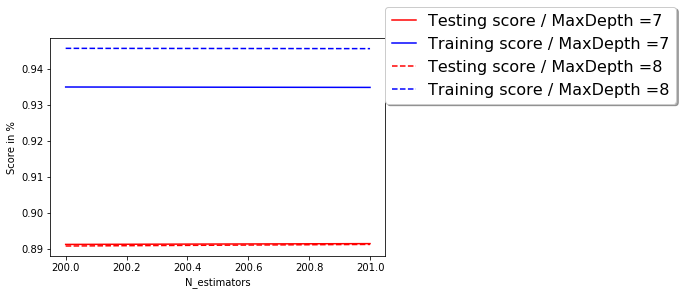

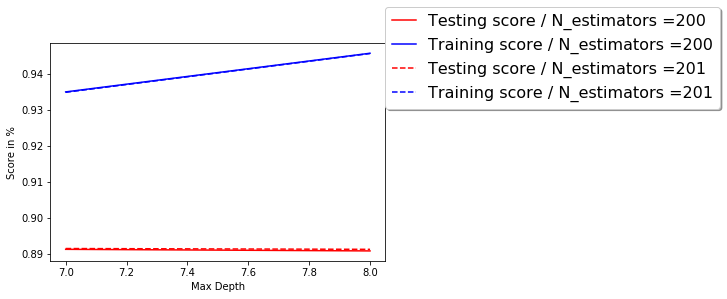

In [15]:
SpiritAnalyse.PlotGraphs(MaxDepthList=[7,8],TestSizeList=[0.2],NestimatorsList=[200,201])

## Burn Analyse !

In [29]:
burn = Train('Burn',DeckDictBurn)
burn.MakeTrainingSetWithModel(7,TrainingSetSize=0,TrainingFileName='TrainingSetNames')
burn.TransformTrainingSet(TrainingFileInput = 'TrainingSetNames')
burn.TrainAndSaveWeights(Nestimators =100,MaxDepth = 10)

Written !
Written !
N_examples :  303
N_features :  35
0.9834983498349835


In [20]:
burn = Train('Burn',DeckDictBurn)
burn.TrainAndTest(Nestimators = 100,MaxDepth = 10,FindBestNestimators=False, TestSize = 0.2)

N_examples :  303
N_training examples : 242 
N_test examples : 61 

Training Score : 0.9876 
Testing Score : 0.9344 



In [35]:
BurnAnalyse = Analyse('Burn')
BurnAnalyse.AnalysePattern()

                                                                                  

The N°1 feature is the feature : "Damage" of the card N°2  with the score of 11.07 percents 
The N°2 feature is the feature : "CCM" of the card N°4  with the score of 8.23 percents 
The N°3 feature is the feature : "CCM" of the card N°2  with the score of 7.91 percents 
The N°4 feature is the feature : "Color produced (if land)" of the card N°2  with the score of 7.33 percents 
The N°5 feature is the feature : "Damage" of the card N°4  with the score of 6.3 percents 
The N°6 feature is the feature : "type_of_card" of the card N°2  with the score of 6.25 percents 
The N°7 feature is the feature : "Color needed (if not land)" of the card N°2  with the score of 6.2 percents 
The N°8 feature is the feature : "Color produced (if land)" of the card N°4  with the score of 5.99 percents 
The N°9 feature is the feature : "type_of_card" of the card N°4  with the score of 5.91 percents 
The N°10 feature is the feature : "Color produced (if land)" of the card N°1  with the score of 5.55 percents 


In [12]:
humans = Train('Humans',DeckDictHumans)
humans.MakeTrainingSetWithModel(7,TrainingSetSize=0,TrainingFileName='TrainingSetNames')
humans.TransformTrainingSet(TrainingFileInput = 'TrainingSetNames')
humans.TrainAndSaveWeights(Nestimators =100,MaxDepth=10)

Written !
Written !
N_examples :  600
N_features :  98
0.965


In [7]:
humans = Train('Humans',DeckDictHumans)
humans.MakeTrainingSetWithModel(7,TrainingSetSize=0,TrainingFileName='TestingSetNames')
humans.TransformTrainingSet(TrainingFileInput = 'TestingSetNames',TrainingFileOutput = 'TestingSet')

Written !
Written !


In [17]:
humans = Train('Humans',DeckDictHumans)
humans.TrainAndTest(Nestimators = 100, MaxDepth = 10, FindBestNestimators=False, TestSize=0.2)

N_examples :  600
N_training examples : 480 
N_test examples : 120 

Training Score : 0.9792 
Testing Score : 0.9167 



N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.7917 , Best N_estimators found : 100 

Training Score : 0.8854 
Testing Score : 0.7917 

1 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8167 , Best N_estimators found : 100 

Training Score : 0.8812 
Testing Score : 0.8167 

2 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.85 , Best N_estimators found : 100 

Training Score : 0.8688 
Testing Score : 0.85 

3 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8667 , Best N_estimators found : 100 

Training Score : 0.8812 
Testing Score : 0.8667 

4 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found 

Best Score found : 0.8417 , Best N_estimators found : 100 

Training Score : 0.8854 
Testing Score : 0.8417 

38 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8667 , Best N_estimators found : 100 

Training Score : 0.875 
Testing Score : 0.8667 

39 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8583 , Best N_estimators found : 100 

Training Score : 0.8729 
Testing Score : 0.8583 

40 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8667 , Best N_estimators found : 100 

Training Score : 0.8708 
Testing Score : 0.8667 

41 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.8625 
Testing Score : 0.9 

42 / 600


Testing Score : 0.875 

75 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8583 , Best N_estimators found : 100 

Training Score : 0.8812 
Testing Score : 0.8583 

76 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8667 , Best N_estimators found : 100 

Training Score : 0.875 
Testing Score : 0.8667 

77 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.8688 
Testing Score : 0.9 

78 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.8708 
Testing Score : 0.8917 

79 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best 

Best Score found : 0.825 , Best N_estimators found : 100 

Training Score : 0.9312 
Testing Score : 0.825 

113 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.875 , Best N_estimators found : 100 

Training Score : 0.925 
Testing Score : 0.875 

114 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8583 , Best N_estimators found : 100 

Training Score : 0.9271 
Testing Score : 0.8583 

115 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8167 , Best N_estimators found : 100 

Training Score : 0.9396 
Testing Score : 0.8167 

116 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9354 
Testing Score : 0.8917 

117

Best Score found : 0.85 , Best N_estimators found : 100 

Training Score : 0.9375 
Testing Score : 0.85 

150 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.9396 
Testing Score : 0.9 

151 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8417 , Best N_estimators found : 100 

Training Score : 0.9354 
Testing Score : 0.8417 

152 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9396 
Testing Score : 0.8917 

153 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.875 , Best N_estimators found : 100 

Training Score : 0.9396 
Testing Score : 0.875 

154 / 600


Training Score : 0.9542 
Testing Score : 0.8667 

187 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8333 , Best N_estimators found : 100 

Training Score : 0.9312 
Testing Score : 0.8333 

188 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8333 , Best N_estimators found : 100 

Training Score : 0.9312 
Testing Score : 0.8333 

189 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8667 , Best N_estimators found : 100 

Training Score : 0.9208 
Testing Score : 0.8667 

190 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9312 
Testing Score : 0.8917 

191 / 600
N_examples :  600
N_training examples : 480 
N_t

Training Score : 0.975 
Testing Score : 0.9083 

224 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9792 
Testing Score : 0.8917 

225 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8833 , Best N_estimators found : 100 

Training Score : 0.9833 
Testing Score : 0.8833 

226 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 0.9771 
Testing Score : 0.9083 

227 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 0.9729 
Testing Score : 0.9167 

228 / 600
N_examples :  600
N_training examples : 480 
N_te

Testing Score : 0.9167 

261 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.9833 
Testing Score : 0.9 

262 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.95 , Best N_estimators found : 100 

Training Score : 0.9667 
Testing Score : 0.95 

263 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 0.9771 
Testing Score : 0.9083 

264 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8667 , Best N_estimators found : 100 

Training Score : 0.9708 
Testing Score : 0.8667 

265 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the be

Testing Score : 0.925 

298 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9333 , Best N_estimators found : 100 

Training Score : 0.9708 
Testing Score : 0.9333 

299 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9875 
Testing Score : 0.8917 

300 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.925 , Best N_estimators found : 100 

Training Score : 0.9938 
Testing Score : 0.925 

301 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 0.9896 
Testing Score : 0.9167 

302 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding

Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9958 
Testing Score : 0.8917 

336 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.875 , Best N_estimators found : 100 

Training Score : 0.9938 
Testing Score : 0.875 

337 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9938 
Testing Score : 0.8917 

338 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 0.9875 
Testing Score : 0.9083 

339 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9583 , Best N_estimators found : 100 

Training Score : 0.9938 
Testing Score : 0.9583 



Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 0.9896 
Testing Score : 0.9167 

373 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 0.9958 
Testing Score : 0.9083 

374 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 0.9854 
Testing Score : 0.9083 

375 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9917 
Testing Score : 0.8917 

376 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.875 , Best N_estimators found : 100 

Training Score : 0.9917 
Testing Score : 0.875 



Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.9938 
Testing Score : 0.9 

410 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.925 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.925 

411 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9083 

412 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.875 , Best N_estimators found : 100 

Training Score : 0.9958 
Testing Score : 0.875 

413 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8833 , Best N_estimators found : 100 

Training Score : 0.9917 
Testing Score : 0.8833 

414 / 600
N_ex

Testing Score : 0.925 

447 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9583 , Best N_estimators found : 100 

Training Score : 0.9958 
Testing Score : 0.9583 

448 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 0.9958 
Testing Score : 0.9167 

449 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 0.9958 
Testing Score : 0.9167 

450 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9333 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9333 

451 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding 

Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.9979 
Testing Score : 0.9 

485 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9333 , Best N_estimators found : 100 

Training Score : 0.9979 
Testing Score : 0.9333 

486 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.8917 

487 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 0.9979 
Testing Score : 0.8917 

488 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9167 

489 / 600


Testing Score : 0.9417 

522 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 0.9979 
Testing Score : 0.9167 

523 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9417 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9417 

524 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.8917 

525 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9 

526 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_

Best Score found : 0.925 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.925 

560 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9417 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9417 

561 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 0.9979 
Testing Score : 0.9 

562 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9167 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9167 

563 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9083 

564 / 600
N_exampl

Best Score found : 0.9 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9 

598 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.8917 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.8917 

599 / 600
N_examples :  600
N_training examples : 480 
N_test examples : 120 

Finding the best N_estimators ...
Best Score found : 0.9083 , Best N_estimators found : 100 

Training Score : 1.0 
Testing Score : 0.9083 

600 / 600


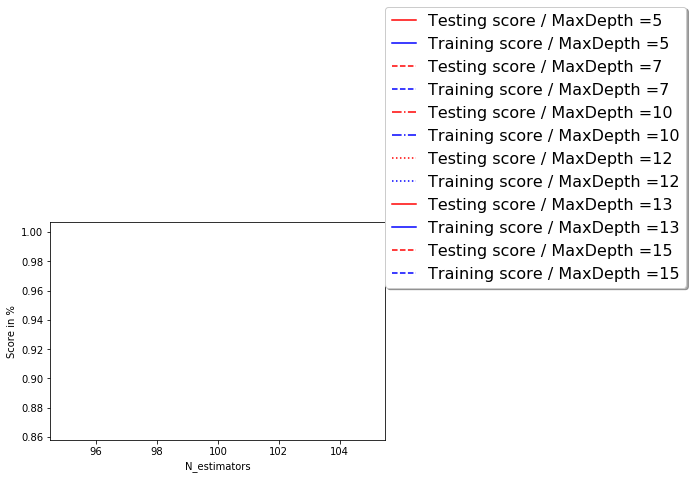

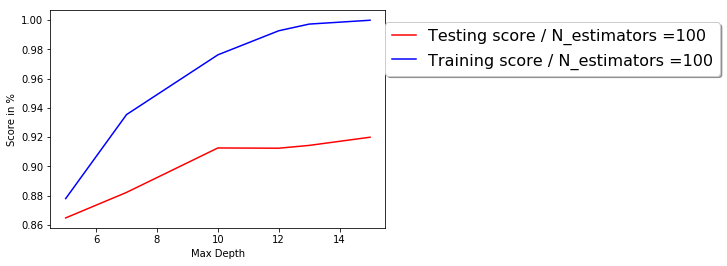

In [8]:
HumansAnalyse = Analyse('Humans')
HumansAnalyse.PlotGraphs(MaxDepthList=[5,7,10,12,13,15],TestSizeList=[0.2],NestimatorsList=[100],Nexperiments=100)

In [4]:
from DeckDictHumans import *
humans = Main('Humans',DeckDictHumans,Resolution='low')
humans.TestModel(0)

In [ ]:
SpiritAnalyse = Analyse('BantSpirit')
SpiritAnalyse.PlotGraphs(MaxDepthList=[7],TestSizeList=[0.2],NestimatorsList = [200,201], Nexperiments = 100)

## Lets compare with a NN-model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda
from keras.layers import Flatten, Input
from keras.models import Model
import tensorflow as tf
from keras import optimizers
from keras.optimizers import Adam

DeckName = 'BantSpirit'

NNtry = Utility()
Data = NNtry.read(DeckName+'/Training_set_'+DeckName+'/TrainingSet.csv',header = None)
TestData = NNtry.read(DeckName+'/Training_set_'+DeckName+'/TestingSet.csv',header = None)

X_test, y_test = TestData[:,:-1],TestData[:,-1]
X_train, y_train = Data[:,:-1],Data[:,-1]

N_examples = X_train.shape[0]
N_features = X_train.shape[1]


print("N_examples : ",N_examples)
print("N_features : ",N_features)

def model_keras(input_shape,alpha):

    model_input = Input(input_shape)
    model = Dense(512, activation='relu')(model_input)
    model = Dropout(0.5)(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(1024, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(512, activation='relu')(model)
    model = Dropout(0.5)(model)
    model = Dense(1, activation='sigmoid')(model)
    
    NNModel = Model(inputs = model_input, outputs = model, name='NNModel')
    return(NNModel)

NN_model = model_keras((N_features,),0.5)

N_examples :  855
N_features :  70


In [29]:
opti = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    # compile the model
NN_model.compile(optimizer=opti, loss='binary_crossentropy', metrics=['acc'])

    # summarize the model
print(NN_model.summary())

    # fit the model
NN_model.fit(X_train, y_train, epochs=100, verbose=1)

    # evaluate the model
loss, accuracy = NN_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 70)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               36352     
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1024)              0         
__________

Conclusion, the Random Forest Classifier works better !